In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
trans = pd.read_csv('combined_csv.csv') #Διαβαζω τα transactions 1,2,3 mazi




<hr>
<li><b>Understand what each table/column represents.</b></li>
<hr>

In [8]:
trans.head() #proepiskophsh twn 5 prwtwn seirwn

,transaction_id,transactions_type,transactions_currency,amount_usd,transactions_state,ea_cardholderpresence,ea_merchant_mcc,ea_merchant_city,ea_merchant_country,direction,user_id,created_date
0,transaction_0,TRANSFER,AED,4.55,COMPLETED,NaN,NaN,NaN,NaN,OUTBOUND,user_4368,2018-04-03 03:34:21.784487
1,transaction_1,CARD_PAYMENT,AED,15.50,COMPLETED,FALSE,4111.0,Dubai,ARE,OUTBOUND,user_2355,2019-03-19 06:15:59.537032
2,transaction_2,CARD_PAYMENT,AED,43.40,COMPLETED,FALSE,5814.0,Dubai,ARE,OUTBOUND,user_2355,2019-03-18 18:53:41.323032
3,transaction_3,TRANSFER,AED,10043.01,COMPLETED,NaN,NaN,NaN,NaN,OUTBOUND,user_2355,2019-03-22 14:20:01.513032
4,transaction_4,CARD_PAYMENT,AED,43.81,COMPLETED,FALSE,5651.0,Abu Dhabi,ARE,OUTBOUND,user_14318,2019-03-22 05:42:50.316652


In [9]:
trans.shape

(2181026, 12)

In [10]:
trans.keys()

Index(['transaction_id', 'transactions_type', 'transactions_currency',
       'amount_usd', 'transactions_state', 'ea_cardholderpresence',
       'ea_merchant_mcc', 'ea_merchant_city', 'ea_merchant_country',
       'direction', 'user_id', 'created_date'],
      dtype='object')

In [11]:
trans.dtypes

transaction_id            object
transactions_type         object
transactions_currency     object
amount_usd               float64
transactions_state        object
ea_cardholderpresence     object
ea_merchant_mcc          float64
ea_merchant_city          object
ea_merchant_country       object
direction                 object
user_id                   object
created_date              object
dtype: object

**1)transactions id :** Id συναλλαγης

**2)transactions type :** Με ποιο μέσο έγινε η συναλλαγη (ATM/ΠΛΗΡΩΜΗ ΚΑΡΤΑΣ κτλ)

**3)transactions currency:** Νομισματική μονάδα συναλλαγης:AED : 2590

**4)amount_usd:** Η συναλλαγη σε ΔΟΛΑΡΙΑ

**5)transaction state:** Κατάσταση της συναλλαγής\
COMPLETED:ολοκληρώθηκε η συναλλαγή\
DECLINED/CANCELLED/FAILED: απορρίφθηκε για κάποιο λόγο\
PENDING:εκκρεμής συναλλαγή\
REVERTED:αρχικά ολοκληρώθηκε αλλά για κάποιο λόγο έγινε επιστροφή (όπως όταν παραγγέλνεις κάτι και το επιστρέφεις και γίνεται επιστροφή χρημάτων)

**6)ea cardholderpresence :** ήταν ή όχι μπροστά ο κάτοχος της κάρτας κατά την συναλλαγή

**7)Ea Merchant Mcc :** To MCC κατηγοριοποιεί την εταιρεία με βάση του τί προσφέρει.(διαφορετικός κωδικός για το φαγητό,διαφορετικός για τα ρούχα)

**8)Ea Merchant City :**Πόλη Εμπόρου

**9)Ea Merchant Country :**Χώρα Εμπόρου

**10)Direction :** Εισερχόμενες ή Εξερχόμενες συναλλαγές

**11)User Id:** ID του χρήστη,θα συνδεθεί με marge με τους άλλους πίνακες

**12)Created Date:** Ημερομηνία συναλλαγής


In [12]:
trans.describe()

,amount_usd,ea_merchant_mcc
count,2.181026e+06,1.257051e+06
mean,1.189225e+05,5.703386e+03
std,6.955454e+07,9.480411e+02
min,0.000000e+00,7.420000e+02
25%,2.030000e+00,5.411000e+03
50%,8.510000e+00,5.812000e+03
75%,2.807000e+01,5.921000e+03
max,7.464155e+10,9.406000e+03


In [13]:
trans.isna().sum()

transaction_id                0
transactions_type             0
transactions_currency         0
amount_usd                    0
transactions_state            0
ea_cardholderpresence    933206
ea_merchant_mcc          923975
ea_merchant_city         924080
ea_merchant_country      924239
direction                     0
user_id                       0
created_date                  0
dtype: int64

In [14]:
x=trans['ea_cardholderpresence'] 

count=0
count1=0
for i in x:
    if i==  'TRUE':
        count+=1
    elif i=='False':
        count1+=1
print('0:',count,'|',count *100/10284,'%')
print('1:',count1,'|',count1 *100/10284,'%')
print(count+count1)
print(x.isna().sum(),'|',x.isna().sum() *100/len(x),'%')

print(count1 *100/len(x))

0: 231311 | 2249.231816413847 %
1: 0 | 0.0 %
231311
933206 | 42.787477086472144 %
0.0


In [15]:
u,c = np.unique (trans.transactions_type , return_counts = True )
for z in zip(list(u) , list(c)):
  print ('{} : {}'.format(z[0],z[1]))

ATM : 74181
CARD_PAYMENT : 1173661
CARD_REFUND : 9209
CASHBACK : 65063
EXCHANGE : 124800
FEE : 18786
REFUND : 1193
TAX : 2267
TOPUP : 309740
TRANSFER : 402126


In [16]:
u,c = np.unique (trans.transactions_currency , return_counts = True )
for z in zip(list(u) , list(c)):
  print ('{} : {}'.format(z[0],z[1]))

AED : 2590
AUD : 13161
BCH : 284
BGN : 219
BTC : 3014
CAD : 6036
CHF : 31291
CZK : 35968
DKK : 11362
ETH : 859
EUR : 931327
GBP : 702488
HKD : 1381
HRK : 187
HUF : 6231
ILS : 2941
INR : 100
JPY : 2590
LTC : 497
MAD : 645
MXN : 108
NOK : 12749
NZD : 2795
PLN : 185800
QAR : 180
RON : 134098
RUB : 26
SAR : 11
SEK : 17804
SGD : 2014
THB : 1796
TRY : 3629
USD : 62331
XRP : 2101
ZAR : 2413


In [17]:
u,c = np.unique (trans.transactions_state , return_counts = True )
for z in zip(list(u) , list(c)):
  print ('{} : {}'.format(z[0],z[1]))

CANCELLED : 1364
COMPLETED : 1916387
DECLINED : 124226
FAILED : 32566
PENDING : 17153
REVERTED : 89330


In [18]:
u,c = np.unique (trans.direction                          , return_counts = True )
for z in zip(list(u) , list(c)):
  print ('{} : {}'.format(z[0],z[1]))

INBOUND : 421947
OUTBOUND : 1759079


In [19]:
trans['amount_usd'].min()

0.0

In [20]:
trans['amount_usd'].max()

74641551593.26

In [21]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [22]:
trans1 = trans.sort_values('amount_usd') #shortara kata ay3oysa seira.Parathrw oti oi teleytaies synallages,oi megalyteres einai DECLINED
trans1

,transaction_id,transactions_type,transactions_currency,amount_usd,transactions_state,ea_cardholderpresence,ea_merchant_mcc,ea_merchant_city,ea_merchant_country,direction,user_id,created_date
2181025,transaction_1499999,CARD_PAYMENT,GBP,0.000000e+00,REVERTED,FALSE,5946.0,www.gopro.com,NLD,OUTBOUND,user_14764,2019-01-31 13:58:09.876585
1076837,transaction_1776837,CARD_PAYMENT,GBP,0.000000e+00,PENDING,FALSE,5999.0,35314369001,GBR,OUTBOUND,user_513,2019-04-24 04:02:52.314160
1076836,transaction_1776836,CARD_PAYMENT,GBP,0.000000e+00,PENDING,FALSE,5999.0,35314369001,GBR,OUTBOUND,user_513,2019-04-24 04:02:35.975160
1076835,transaction_1776835,CARD_PAYMENT,GBP,0.000000e+00,PENDING,FALSE,5999.0,35314369001,GBR,OUTBOUND,user_513,2019-04-24 03:59:49.662160
640739,transaction_640739,CARD_PAYMENT,EUR,0.000000e+00,REVERTED,FALSE,5968.0,g.co/helppay#,GBR,OUTBOUND,user_13023,2018-11-30 10:23:01.582272
...,...,...,...,...,...,...,...,...,...,...,...,...
127491,transaction_127491,TRANSFER,GBP,1.000000e+10,DECLINED,NaN,NaN,NaN,NaN,INBOUND,user_15007,2019-02-27 12:56:46.482754
1341735,transaction_2041735,TRANSFER,EUR,2.553194e+10,DECLINED,NaN,NaN,NaN,NaN,OUTBOUND,user_2795,2018-12-06 22:36:36.758829
1505242,transaction_824216,TRANSFER,GBP,3.600000e+10,DECLINED,NaN,NaN,NaN,NaN,OUTBOUND,user_7159,2019-03-16 15:22:46.076038
1343778,transaction_2043778,TRANSFER,EUR,5.106387e+10,DECLINED,NaN,NaN,NaN,NaN,OUTBOUND,user_14895,2018-11-14 17:15:03.956399


In [23]:
trans['amount_usd'].value_counts()

0.00       46490
0.85       38939
0.01       36561
8.51       36536
10.00      29336
           ...  
334.11         1
443.88         1
440.12         1
202.05         1
2274.84        1
Name: amount_usd, Length: 43465, dtype: int64

In [24]:
trans.isna().sum()

transaction_id                0
transactions_type             0
transactions_currency         0
amount_usd                    0
transactions_state            0
ea_cardholderpresence    933206
ea_merchant_mcc          923975
ea_merchant_city         924080
ea_merchant_country      924239
direction                     0
user_id                       0
created_date                  0
dtype: int64

Κατα τον κώδικα του Λευτέρη,αλλά δε νομίζω να έχει κάποιο νόημα όταν η πλειοψηφία είναι NaΝ

In [25]:
x=trans['ea_cardholderpresence'] 

count=0
count1=0
for i in x:
    if i==  'TRUE':
        count+=1
    elif i=='False':
        count1+=1
print('0:',count,'|',count *100/10284,'%')
print('1:',count1,'|',count1 *100/10284,'%')
print(count+count1)
print(x.isna().sum(),'|',x.isna().sum() *100/len(x),'%')

print(count1 *100/len(x))

0: 231311 | 2249.231816413847 %
1: 0 | 0.0 %
231311
933206 | 42.787477086472144 %
0.0


In [26]:
trans[trans['transactions_state'].apply(lambda x: x.isdigit())].head(2) # ελέχγω αν στη στήλη state εχω καποιον αριθμό αντι για όνομα πόλης

,transaction_id,transactions_type,transactions_currency,amount_usd,transactions_state,ea_cardholderpresence,ea_merchant_mcc,ea_merchant_city,ea_merchant_country,direction,user_id,created_date


<hr>
<li><b>Κάνω drop τις στήλες με τα Na γιατί θεωρώ ότι δε μου χρειάζονται</b></li>
<hr>

In [27]:
trans2 = trans.dropna(axis=1)
trans2.drop(['created_date'],axis=1,inplace=True)
trans2

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,transaction_id,transactions_type,transactions_currency,amount_usd,transactions_state,direction,user_id
0,transaction_0,TRANSFER,AED,4.55,COMPLETED,OUTBOUND,user_4368
1,transaction_1,CARD_PAYMENT,AED,15.50,COMPLETED,OUTBOUND,user_2355
2,transaction_2,CARD_PAYMENT,AED,43.40,COMPLETED,OUTBOUND,user_2355
3,transaction_3,TRANSFER,AED,10043.01,COMPLETED,OUTBOUND,user_2355
4,transaction_4,CARD_PAYMENT,AED,43.81,COMPLETED,OUTBOUND,user_14318
...,...,...,...,...,...,...,...
2181021,transaction_1499995,CARD_PAYMENT,GBP,0.00,REVERTED,OUTBOUND,user_4545
2181022,transaction_1499996,CARD_PAYMENT,GBP,0.00,REVERTED,OUTBOUND,user_8818
2181023,transaction_1499997,CARD_PAYMENT,GBP,0.00,REVERTED,OUTBOUND,user_12430
2181024,transaction_1499998,CARD_PAYMENT,GBP,0.00,REVERTED,OUTBOUND,user_14764


In [28]:
trans2['transactions_type']=trans2['transactions_type'].apply(lambda x : x.lower()) 
trans2['transactions_state']=trans2['transactions_state'].apply(lambda x : x.lower())
trans2['direction']=trans2['direction'].apply(lambda x : x.lower()) 
trans2['transactions_currency']=trans2['transactions_currency'].apply(lambda x : x.lower())

trans2.head(3)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

,transaction_id,transactions_type,transactions_currency,amount_usd,transactions_state,direction,user_id
0,transaction_0,transfer,aed,4.55,completed,outbound,user_4368
1,transaction_1,card_payment,aed,15.50,completed,outbound,user_2355
2,transaction_2,card_payment,aed,43.40,completed,outbound,user_2355


In [29]:
trans2.shape

(2181026, 7)

In [30]:
trans2['transaction_id'].value_counts()


transaction_1182917    1
transaction_1441582    1
transaction_105660     1
transaction_1682813    1
transaction_966698     1
                      ..
transaction_105457     1
transaction_1614915    1
transaction_1638123    1
transaction_417514     1
transaction_655913     1
Name: transaction_id, Length: 2181026, dtype: int64

In [31]:
print(len(trans[trans['ea_cardholderpresence'] == True]))
print(len(trans[trans['ea_cardholderpresence'] != False]))   #den exw idea gt den emfanizei

0
2181026


In [32]:
u,c = np.unique (trans.transactions_type , return_counts = True )
for z in zip(list(u) , list(c)):
  print ('{} : {}'.format(z[0],z[1]))

ATM : 74181
CARD_PAYMENT : 1173661
CARD_REFUND : 9209
CASHBACK : 65063
EXCHANGE : 124800
FEE : 18786
REFUND : 1193
TAX : 2267
TOPUP : 309740
TRANSFER : 402126


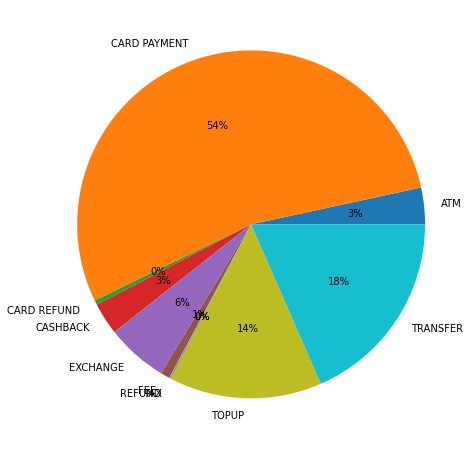

In [33]:
plt.figure(figsize=(8,8))
labels = ['ATM' , 'CARD PAYMENT' , 'CARD REFUND' , 'CASHBACK', 'EXCHANGE' , 'FEE' , 'REFUND' , 'TAX' , 'TOPUP' , 'TRANSFER']
values = [74181,1173661,9209,65063,124800,18786,1193,2267,309740,402126]
plt.pie(values , labels=labels ,  autopct='%1.0f%%')
plt.savefig('fig1.png')
plt.show()

In [34]:
trans['amount_usd'].sum()

259373011012.1501

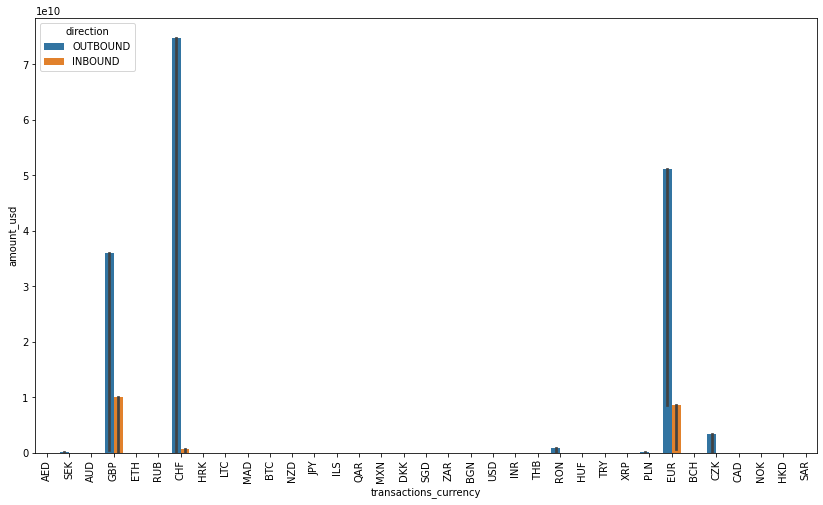

In [35]:
categories = [trans.transactions_currency]
trans['amount_usd'] = trans['amount_usd'].astype(int) #kanw cast ola ta price se akeraious
plt.figure(figsize=(14,8))
ax = plt.subplot(1,1,1)
plt.xticks(rotation = 'vertical') #anti gia vertical mporw na vale moires p.x 45 kai ta gyrnaei ypo gwnia
sns.barplot(x= 'transactions_currency' , y= 'amount_usd' , data = trans , estimator = np.max ,hue = 'direction') #me to estimator ayto briskw oti h mercedes exei genika to akribotero montelo
plt.savefig('fig6.png')
plt.show()

In [36]:
len(trans[trans['direction']=='INBOUND'])


421947

In [37]:
len(trans[trans['direction']=='OUTBOUND'])

1759079

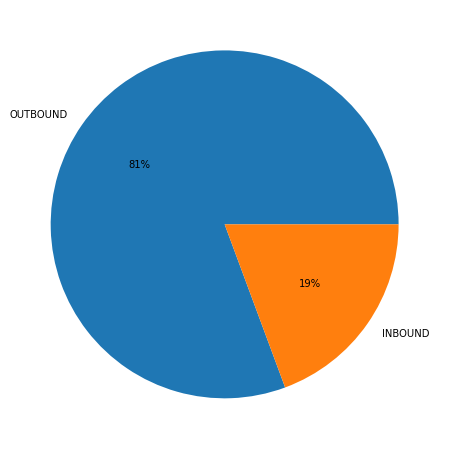

In [38]:
plt.figure(figsize=(8,8))
labels = ['OUTBOUND' , 'INBOUND']
values = [1759079,421947]
plt.pie(values , labels=labels ,  autopct='%1.0f%%')
plt.savefig('fig3.png')
plt.show()

In [39]:
len(trans[trans['user_id']=='user_2355'])  #vlepw poses eggrafes exei 1  sygkekrimenos user 


588

In [40]:
trans2.groupby(['transactions_type']).mean()

,amount_usd
transactions_type,
atm,73.640630
card_payment,21.453367
card_refund,65.049085
cashback,0.092411
exchange,193.405059
fee,8.118956
refund,400.217720
tax,0.099991
topup,176.800100


In [41]:
trans3 = trans2.drop(trans.index[trans['amount_usd']== 0.0  ])
trans3

,transaction_id,transactions_type,transactions_currency,amount_usd,transactions_state,direction,user_id
0,transaction_0,transfer,aed,4.55,completed,outbound,user_4368
1,transaction_1,card_payment,aed,15.50,completed,outbound,user_2355
2,transaction_2,card_payment,aed,43.40,completed,outbound,user_2355
3,transaction_3,transfer,aed,10043.01,completed,outbound,user_2355
4,transaction_4,card_payment,aed,43.81,completed,outbound,user_14318
...,...,...,...,...,...,...,...
2181015,transaction_1499989,card_payment,gbp,4.35,completed,outbound,user_8637
2181016,transaction_1499990,topup,gbp,50.00,completed,inbound,user_1552
2181017,transaction_1499991,transfer,gbp,450.00,completed,outbound,user_4888
2181018,transaction_1499992,transfer,gbp,5.00,completed,inbound,user_4272


In [42]:
trans3.shape


(1812686, 7)

In [43]:
trans3.describe()

,amount_usd
count,1.812686e+06
mean,1.430876e+05
std,7.629472e+07
min,1.000000e+00
25%,4.680000e+00
50%,1.135000e+01
75%,3.877000e+01
max,7.464155e+10


In [46]:
trans3['amount_usd'].sum()

259372869336.43005

In [47]:
trans3['amount_usd'].sum()

259372869336.43005

In [48]:
trans3['amount_usd'].min()

1.0

In [50]:
trans2['amount_usd'].min()

0.0

In [0]:
trans2=trans2.rename(columns={"transaction_id" : "transaction Id"})
trans2=trans2.rename(columns={"transactions_type" : "transaction type"})
trans2=trans2.rename(columns={"transactions_currency" : "transactions currency"})
trans2=trans2.rename(columns={"transactions_state" : "transactions state"})
trans2=trans2.rename(columns={"amount_usd" : "amount usd"})

In [52]:
trans2

,transaction Id,transaction type,transactions currency,amount usd,transactions state,direction,user_id
0,transaction_0,transfer,aed,4.55,completed,outbound,user_4368
1,transaction_1,card_payment,aed,15.50,completed,outbound,user_2355
2,transaction_2,card_payment,aed,43.40,completed,outbound,user_2355
3,transaction_3,transfer,aed,10043.01,completed,outbound,user_2355
4,transaction_4,card_payment,aed,43.81,completed,outbound,user_14318
...,...,...,...,...,...,...,...
2181021,transaction_1499995,card_payment,gbp,0.00,reverted,outbound,user_4545
2181022,transaction_1499996,card_payment,gbp,0.00,reverted,outbound,user_8818
2181023,transaction_1499997,card_payment,gbp,0.00,reverted,outbound,user_12430
2181024,transaction_1499998,card_payment,gbp,0.00,reverted,outbound,user_14764


In [53]:
trans2['amount usd'].value_counts(ascending = True)

2274.84        1
202.05         1
440.12         1
443.88         1
334.11         1
           ...  
10.00      29336
8.51       36536
0.01       36561
0.85       38939
0.00       46490
Name: amount usd, Length: 43465, dtype: int64

In [0]:
#trans3 = trans2.drop(trans5.index[trans5['transactions_state'] == 'FAILED'] )
#trans3

<hr>
<li> <b> Outliers <b> </li>
<hr>

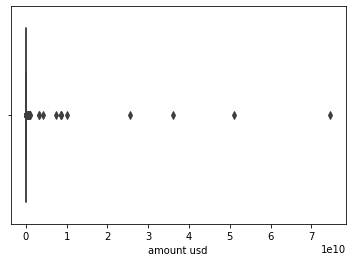

In [55]:
sns.boxplot(trans2['amount usd']) #with outliers

In [56]:
trans2['amount usd'].describe()


count    2.181026e+06
mean     1.189225e+05
std      6.955454e+07
min      0.000000e+00
25%      2.030000e+00
50%      8.510000e+00
75%      2.807000e+01
max      7.464155e+10
Name: amount usd, dtype: float64

In [57]:
trans2.columns

Index(['transaction Id', 'transaction type', 'transactions currency',
       'amount usd', 'transactions state', 'direction', 'user_id'],
      dtype='object')

In [58]:
trans2['transactions state'].value_counts()

completed    1916387
declined      124226
reverted       89330
failed         32566
pending        17153
cancelled       1364
Name: transactions state, dtype: int64

In [0]:
trans3 = trans2.groupby(['user_id'])['amount usd'].agg([sum,len])

In [60]:
trans3

,sum,len
user_id,,
user_0,7122.21,545.0
user_1,14162.08,146.0
user_10,6256.46,143.0
user_100,6344.10,66.0
user_1000,901.62,47.0
...,...,...
user_9995,324.41,8.0
user_9996,1710.40,37.0
user_9997,15043.07,146.0


In [61]:
users = pd.read_csv('users_lefteris.csv')
users

,user_id,birth_year,country,city,created_date,user_settings_crypto_unlocked,plan,attributes_notifications_marketing_push,attributes_notifications_marketing_email,num_contacts,num_referrals,num_successful_referrals
0,user_0,1992,ES,Madrid,2018-09-10 18:46:42.843855,0,STANDARD,1.0,1.0,3,0,0
1,user_1,1985,LT,Klaipeda,2018-01-11 18:53:10.531146,1,STANDARD,NaN,NaN,75,0,0
2,user_2,1996,IE,Carrickmacross,2018-11-29 17:29:16.879324,0,STANDARD,NaN,NaN,71,0,0
3,user_3,1981,IE,Dublin,2018-02-17 11:58:08.319664,0,STANDARD,NaN,NaN,219,0,0
4,user_4,1992,GB,London,2018-01-08 18:40:21.097856,0,STANDARD,NaN,NaN,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
15539,user_15539,1997,PL,Bralin,2018-08-05 05:56:40.787458,0,STANDARD,1.0,1.0,0,0,0
15540,user_15540,1985,PL,Poznań,2018-03-29 12:19:05.567779,0,STANDARD,NaN,NaN,0,0,0
15541,user_15541,1978,GB,London,2018-07-13 15:56:50.339746,0,STANDARD,1.0,1.0,16,0,0
15542,user_15542,1977,IE,Dublin,2018-01-07 15:53:43.719983,0,GOLD,1.0,1.0,44,0,0


In [62]:
users.shape

(15544, 12)

In [0]:
result=users.merge(trans3,on="user_id").fillna(0)
result.to_csv("result.csv")



In [64]:
result.head(4)

,user_id,birth_year,country,city,created_date,user_settings_crypto_unlocked,plan,attributes_notifications_marketing_push,attributes_notifications_marketing_email,num_contacts,num_referrals,num_successful_referrals,sum,len
0,user_0,1992,ES,Madrid,2018-09-10 18:46:42.843855,0,STANDARD,1.0,1.0,3,0,0,7122.21,545.0
1,user_1,1985,LT,Klaipeda,2018-01-11 18:53:10.531146,1,STANDARD,0.0,0.0,75,0,0,14162.08,146.0
2,user_2,1996,IE,Carrickmacross,2018-11-29 17:29:16.879324,0,STANDARD,0.0,0.0,71,0,0,2983.40,282.0
3,user_3,1981,IE,Dublin,2018-02-17 11:58:08.319664,0,STANDARD,0.0,0.0,219,0,0,8270.65,158.0


In [65]:
result.shape

(15012, 14)

In [66]:
result=result.rename(columns={"len" : "number of trans"})
result=result.rename(columns={"sum" : "sum of trans"})

result.head(4)

,user_id,birth_year,country,city,created_date,user_settings_crypto_unlocked,plan,attributes_notifications_marketing_push,attributes_notifications_marketing_email,num_contacts,num_referrals,num_successful_referrals,sum of trans,number of trans
0,user_0,1992,ES,Madrid,2018-09-10 18:46:42.843855,0,STANDARD,1.0,1.0,3,0,0,7122.21,545.0
1,user_1,1985,LT,Klaipeda,2018-01-11 18:53:10.531146,1,STANDARD,0.0,0.0,75,0,0,14162.08,146.0
2,user_2,1996,IE,Carrickmacross,2018-11-29 17:29:16.879324,0,STANDARD,0.0,0.0,71,0,0,2983.40,282.0
3,user_3,1981,IE,Dublin,2018-02-17 11:58:08.319664,0,STANDARD,0.0,0.0,219,0,0,8270.65,158.0


In [67]:
result['sum of trans'].max()

82852125991.10994

In [68]:
result['sum of trans'].min()

0.0

In [69]:
result['number of trans'].max()

3381.0

In [70]:
result['number of trans'].min()

1.0

In [71]:
result['number of trans'].describe()

count    15012.000000
mean       145.285505
std        241.520460
min          1.000000
25%         17.000000
50%         60.000000
75%        167.000000
max       3381.000000
Name: number of trans, dtype: float64

In [72]:
result['number of trans'].value_counts()

3.0       511
2.0       447
4.0       325
5.0       277
6.0       256
         ... 
2224.0      1
834.0       1
950.0       1
1012.0      1
583.0       1
Name: number of trans, Length: 1059, dtype: int64

In [73]:
result['No of trans by 20'] = result['number of trans'].apply(lambda x:x// 20)
result['No of trans by 20'].value_counts()


0.0      4056
1.0      1923
2.0      1485
3.0      1063
4.0       910
         ... 
90.0        1
115.0       1
111.0       1
138.0       1
84.0        1
Name: No of trans by 20, Length: 116, dtype: int64

In [76]:
result.head(5)

,user_id,birth_year,country,city,created_date,user_settings_crypto_unlocked,plan,attributes_notifications_marketing_push,attributes_notifications_marketing_email,num_contacts,num_referrals,num_successful_referrals,sum of trans,number of trans,No of trans by 20
0,user_0,1992,ES,Madrid,2018-09-10 18:46:42.843855,0,STANDARD,1.0,1.0,3,0,0,7122.21,545.0,27.0
1,user_1,1985,LT,Klaipeda,2018-01-11 18:53:10.531146,1,STANDARD,0.0,0.0,75,0,0,14162.08,146.0,7.0
2,user_2,1996,IE,Carrickmacross,2018-11-29 17:29:16.879324,0,STANDARD,0.0,0.0,71,0,0,2983.40,282.0,14.0
3,user_3,1981,IE,Dublin,2018-02-17 11:58:08.319664,0,STANDARD,0.0,0.0,219,0,0,8270.65,158.0,7.0
4,user_4,1992,GB,London,2018-01-08 18:40:21.097856,0,STANDARD,0.0,0.0,0,0,0,1068.40,59.0,2.0


In [77]:
result['sum of trans'].describe()

count    1.501200e+04
mean     1.727771e+07
std      8.952744e+08
min      0.000000e+00
25%      4.499050e+02
50%      2.527545e+03
75%      8.162913e+03
max      8.285213e+10
Name: sum of trans, dtype: float64

In [78]:
pd.crosstab(index=result['country'], columns=result['plan'])

plan,GOLD,SILVER,STANDARD
country,,,
AT,2,2,60
AU,0,0,3
BE,1,5,99
BG,1,1,70
CH,25,21,294
CY,5,10,130
CZ,10,12,254
DE,12,20,303
DK,3,5,66


In [79]:
pd.crosstab(index=result['user_settings_crypto_unlocked'], columns=result['plan'])

plan,GOLD,SILVER,STANDARD
user_settings_crypto_unlocked,,,
0,177,377,11653
1,260,336,2209


##Εδώ έχω χάσει 542 σειρές που δεν έκαναν καμία συναλλαγή ή που δεν επιχείρησαν να κάνουν κάποια συναλλαγή

In [80]:
pd.crosstab(index=result['country'], columns=result['plan'])

plan,GOLD,SILVER,STANDARD
country,,,
AT,2,2,60
AU,0,0,3
BE,1,5,99
BG,1,1,70
CH,25,21,294
CY,5,10,130
CZ,10,12,254
DE,12,20,303
DK,3,5,66


In [0]:
dev = pd.read_csv('devices.csv') 


In [0]:
result=result.merge(dev,on="user_id").fillna(0)
result.to_csv("result.csv")



In [83]:
result.head(3)

,user_id,birth_year,country,city,created_date,user_settings_crypto_unlocked,plan,attributes_notifications_marketing_push,attributes_notifications_marketing_email,num_contacts,num_referrals,num_successful_referrals,sum of trans,number of trans,No of trans by 20,brand
0,user_0,1992,ES,Madrid,2018-09-10 18:46:42.843855,0,STANDARD,1.0,1.0,3,0,0,7122.21,545.0,27.0,Apple
1,user_1,1985,LT,Klaipeda,2018-01-11 18:53:10.531146,1,STANDARD,0.0,0.0,75,0,0,14162.08,146.0,7.0,Apple
2,user_2,1996,IE,Carrickmacross,2018-11-29 17:29:16.879324,0,STANDARD,0.0,0.0,71,0,0,2983.40,282.0,14.0,Apple


In [109]:
result.keys()

Index(['user_id', 'birth_year', 'country', 'city', 'created_date',
       'user_settings_crypto_unlocked', 'plan',
       'attributes_notifications_marketing_push',
       'attributes_notifications_marketing_email', 'num_contacts',
       'num_referrals', 'num_successful_referrals', 'sum of trans',
       'number of trans', 'No of trans by 20', 'brand'],
      dtype='object')

##ΜΕΡΙΚΑ ΣΧΗΜΑΤΑ ΜΕΧΡΙ ΝΑ ΚΑΤΑΛΗΞΟΥΜΕ ΣΕ ΚΑΠΟΙΑ (ΒΑΡΙΟΜΟΥΝ ΚΑΙ ΕΙΠΑ ΝΑ ΠΑΙΞΩ ΛΙΓΟ)

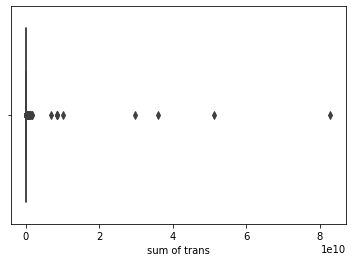

In [84]:
sns.boxplot(result['sum of trans']) 



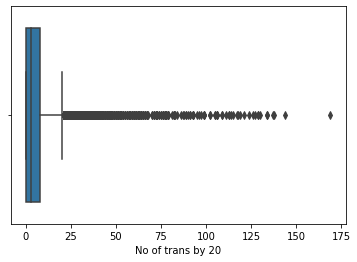

In [85]:
sns.boxplot(result['No of trans by 20'])

In [0]:
from scipy.stats import pearsonr


def corrfunc(x,y,ax=None,**kws):
  r,_=pearsonr(x,y)
  ax=ax or plt.gca()
  rho='\u03C1'
  ax.annotate(f'{rho} = {r:.2f}', xy=(.1, .9), xycoords=ax.transAxes)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to c

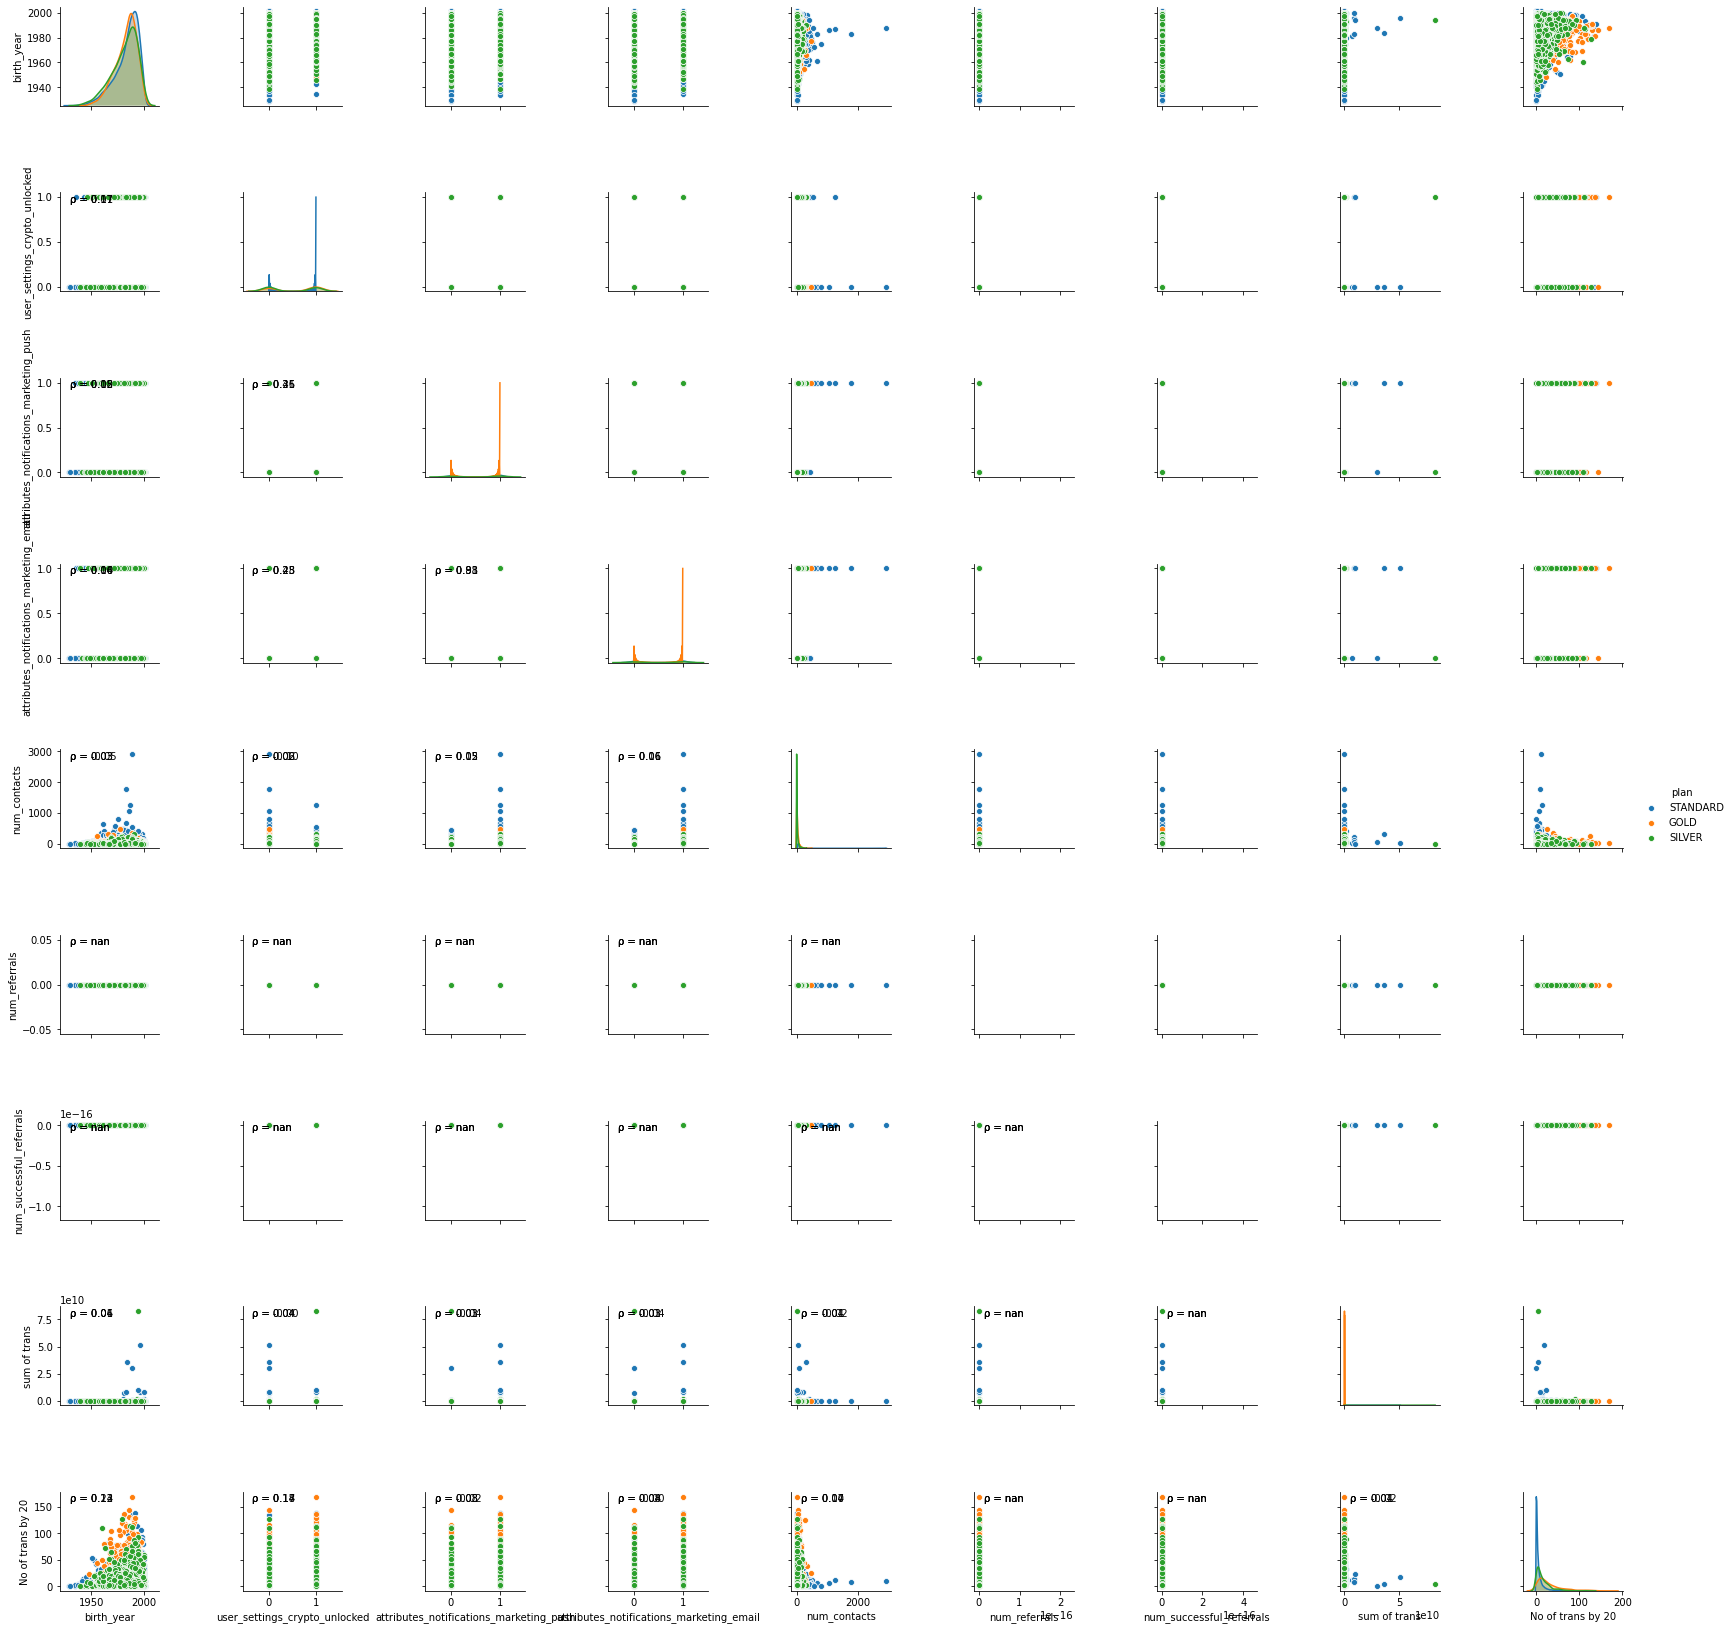

In [224]:
ax=sns.pairplot(result , hue = 'plan' )
ax.map_lower(corrfunc)
plt.show()

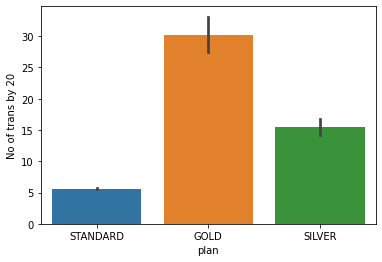

In [89]:
sns.barplot(x = 'plan' , y = 'No of trans by 20' , data = result  )

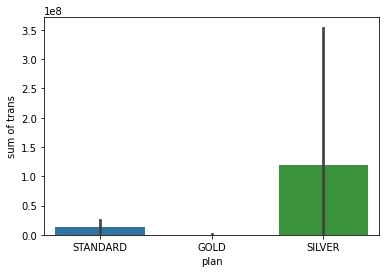

In [92]:
sns.barplot(x = 'plan' , y = 'sum of trans' , data = result  )

In [117]:
result.keys()

Index(['user_id', 'birth_year', 'country', 'city', 'created_date',
       'user_settings_crypto_unlocked', 'plan',
       'attributes_notifications_marketing_push',
       'attributes_notifications_marketing_email', 'num_contacts',
       'num_referrals', 'num_successful_referrals', 'sum of trans',
       'number of trans', 'No of trans by 20', 'brand'],
      dtype='object')

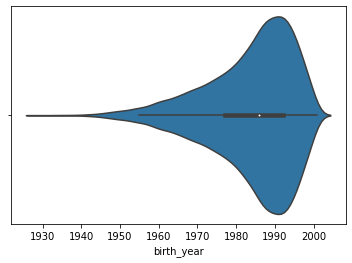

In [131]:
ax = sns.violinplot(x=result["birth_year"] )


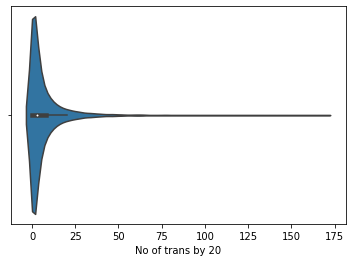

In [136]:
ax = sns.violinplot(x=result["No of trans by 20"])


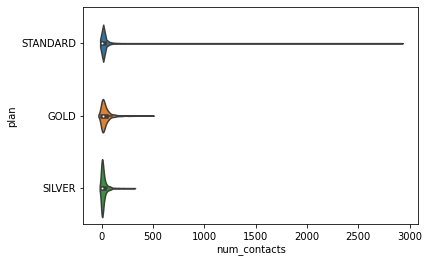

In [132]:
ax = sns.violinplot(x=result["num_contacts"] , y = result['plan'])


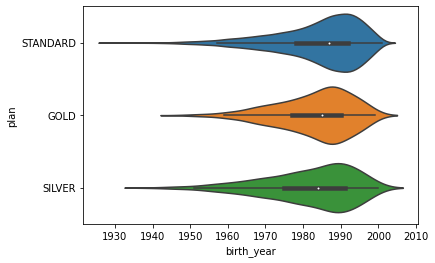

In [137]:
ax = sns.violinplot(x=result["birth_year"] , y = result['plan'])


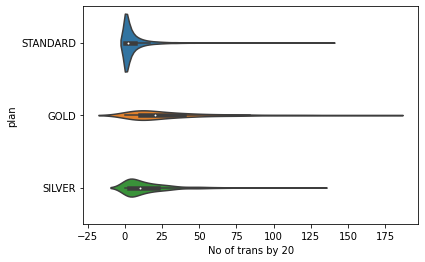

In [138]:
ax = sns.violinplot(x=result["No of trans by 20"] , y = result['plan'])
